### Read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from load_mg_data import load_microgrid_data # no longer needed

In [ ]:
dir = '../data/CityLearn2021-data/'
#df = load_microgrid_data(dir)

In [2]:
df = pd.read_csv('data.csv')
df = df.iloc[0:24*365*2,:]
df['Month'] = df['Month'].astype('category')
day_types=['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Holiday']

In [ ]:
df.columns

Index(['Month', 'Hour', 'DayType', 'Workday', 'DaylightSavings', 'Load',
       'Load_1', 'Load_2', 'Load_3', 'Load_4', 'Load_5', 'Load_6', 'Load_7',
       'Load_8', 'Load_9', 'SolarGen', 'NetLoad', 'Price',
       'Outdoor Drybulb Temperature [C]', 'Outdoor Relative Humidity [%]',
       'Diffuse Solar Radiation [W/m2]', 'Direct Solar Radiation [W/m2]',
       '6h Prediction Outdoor Drybulb Temperature [C]',
       '12h Prediction Outdoor Drybulb Temperature [C]',
       '24h Prediction Outdoor Drybulb Temperature [C]',
       '6h Prediction Outdoor Relative Humidity [%]',
       '12h Prediction Outdoor Relative Humidity [%]',
       '24h Prediction Outdoor Relative Humidity [%]',
       '6h Prediction Diffuse Solar Radiation [W/m2]',
       '12h Prediction Diffuse Solar Radiation [W/m2]',
       '24h Prediction Diffuse Solar Radiation [W/m2]',
       '6h Prediction Direct Solar Radiation [W/m2]',
       '12h Prediction Direct Solar Radiation [W/m2]',
       '24h Prediction Direct So

In [ ]:
df['SolarGen'].corr(df['24h Prediction Radiation [W/m2]'])

0.942301261619293

### Load by day, by hour

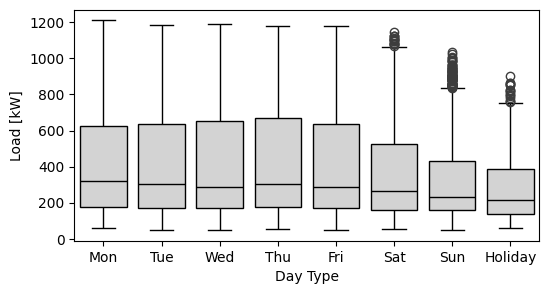

In [ ]:
props = {
    'boxprops':{'facecolor':'lightgrey', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

plt.figure(figsize=(5.5,3))
sns.boxplot(x='DayType', y='Load', hue='DayType'
            , data=df
            ,order=day_types
            # ,palette='muted'
            ,**props
            )
plt.xlabel('Day Type')
plt.ylabel('Load [kW]')
#plt.title('',fontsize=12, fontweight='bold')
plt.savefig('./plots/TX_boxplot_daytype.pdf', format='pdf', bbox_inches='tight')

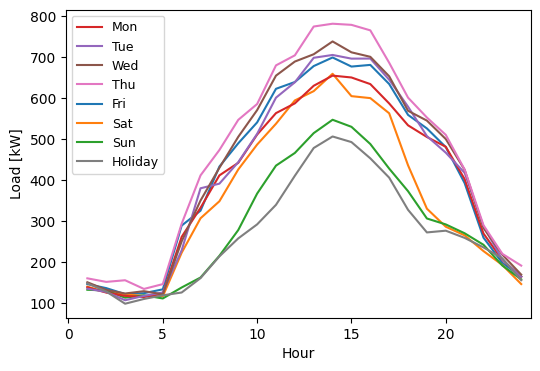

In [ ]:
# plt.figure(figsize=(6,4))
# for day_type in day_types:
#     df_daytype = pd.DataFrame(df[df['DayType']==day_type].groupby('Hour')['Load'].median())
#     sns.lineplot(x='Hour', y='Load', data=df_daytype,label=day_type)

# plt.legend(loc='upper left',fontsize=9)
# plt.xlim(xmax=24.5)
# plt.show()


plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_hour_daytype.pdf', format='pdf',bbox_inches='tight')

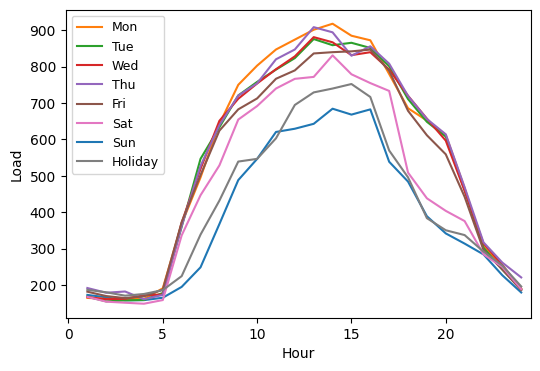

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df.loc[df['DaylightSavings']==1,:]
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()

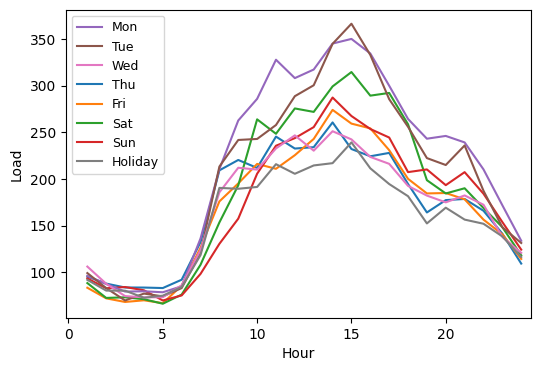

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df.loc[df['DaylightSavings']==0,:]
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()

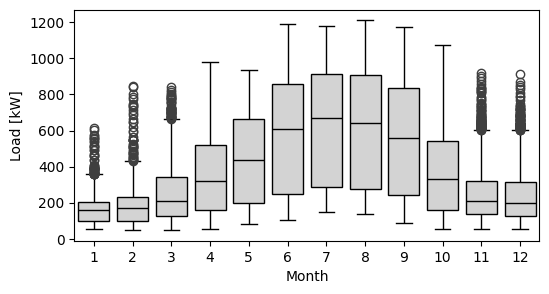

In [ ]:
props = {
    'boxprops':{'facecolor':'lightgrey', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}


plt.figure(figsize=(6,3))
sns.boxplot(x='Month', y='Load'
            #, hue='Month'
            , data=df
            #,palette='muted'
            ,**props
            )
plt.xlabel('Month')
plt.ylabel('Load [kW]')
#plt.title('',fontsize=12, fontweight='bold')
plt.savefig('./plots/TX_boxplot_month.pdf', format='pdf', bbox_inches='tight')

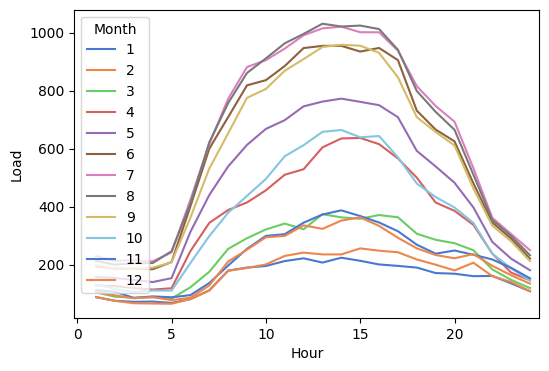

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='Month',data=df
             ,estimator=np.median
             ,errorbar=None,palette='muted'
             )

plt.xlim(xmax=24.5)
plt.show()
plt.savefig('./plots/TX_byhour_bymonth.pdf', format='pdf')

### Scatterplots

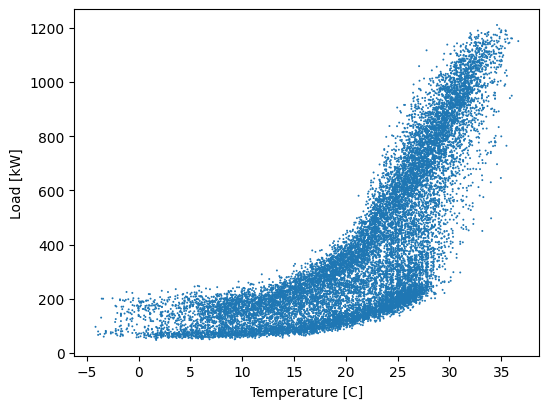

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Drybulb Temperature [C]',y='Load'
                #,hue='Hour'
                ,s=2
                ,alpha=1
                ,edgecolor="none"
                ,data=df)
plt.xlabel('Temperature [C]')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_temper_load.pdf', format='pdf', bbox_inches='tight')

C:\Users\Altafloresta\AppData\Local\Temp\ipykernel_25292\719876294.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spectral = cm.get_cmap('Spectral', 12)


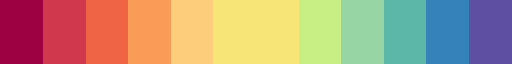

In [ ]:
from matplotlib import cm, colors
spectral = cm.get_cmap('Spectral', 12)
new_spectral = spectral(np.arange(0,12))
new_spectral[5] = np.array([248/256, 230/256, 120/256, 1])
new_spectral[6] = np.array([248/256, 230/256, 120/256, 1])
new_spectral[7] = np.array([200/256, 240/256, 133/256, 1])
new_spectral_cmp = colors.ListedColormap(new_spectral)
new_spectral_cmp

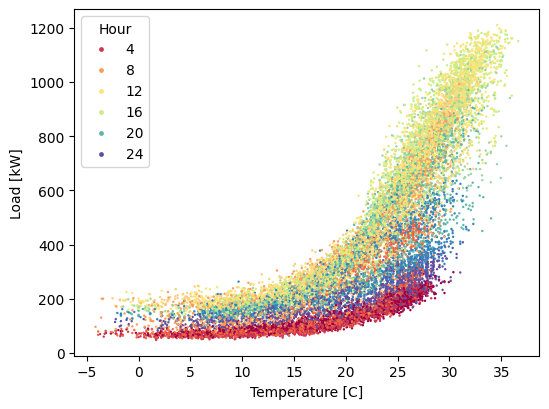

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Drybulb Temperature [C]',y='Load'
                ,hue='Hour'
                ,s=3
                ,alpha=1
                ,edgecolor="none"
                ,palette=new_spectral_cmp # 'Spectral'
                ,data=df)
plt.legend(title='Hour',markerscale=2)
plt.xlabel('Temperature [C]')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_temper_load_byhour.pdf', format='pdf', bbox_inches='tight')

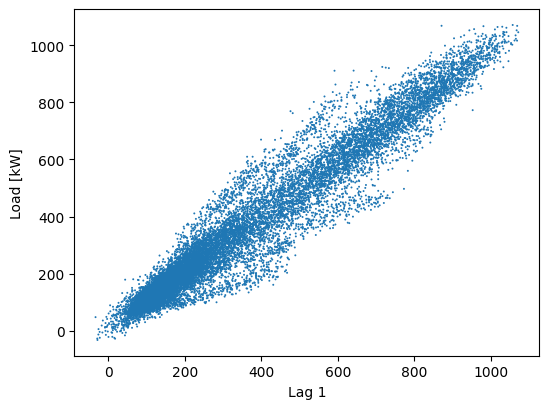

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='NetLoad',y='NetLoadLag'
                #,hue='Hour'
                ,s=2
                ,alpha=1
                ,edgecolor="none"
                ,data=df)
plt.xlabel('Lag 1')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_netloadlag.pdf', format='pdf', bbox_inches='tight')

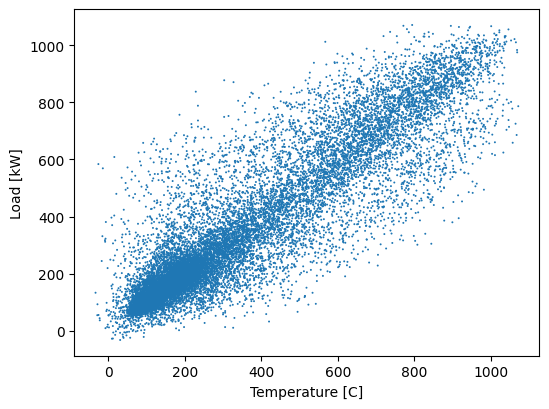

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='NetLoad',y='NetLoadLag24'
                #,hue='Hour'
                ,s=2
                ,alpha=1
                ,edgecolor="none"
                ,data=df)
plt.xlabel('Lag 24')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_netloadlag24.pdf', format='pdf', bbox_inches='tight')

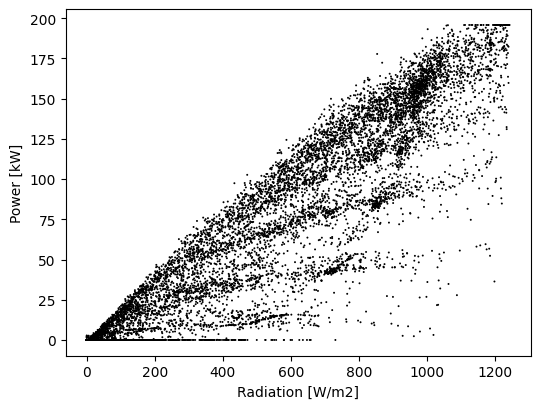

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Radiation [W/m2]',y='SolarGen'
                #,hue='DaylightSavings'
                ,s=2
                ,edgecolor="none"
                ,color='black'
                # ,alpha=0.
                ,data=df)
# plt.xlabel('Temperature [C]')
plt.ylabel('Power [kW]')
plt.savefig('./plots/TX_radiation_generation.pdf', format='pdf', bbox_inches='tight')

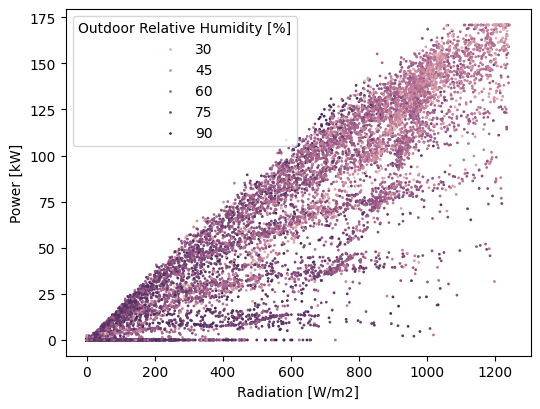

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Radiation [W/m2]',y='SolarGen'
                ,hue='Outdoor Relative Humidity [%]'
                ,s=4
                ,edgecolor="none"
                ,data=df)
# plt.xlabel('Temperature [C]')
plt.ylabel('Power [kW]')
plt.savefig('./plots/TX_radiation_generation_byhour.pdf', format='pdf', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: './plots/TX_radiation_generation_bytemperature.pdf'

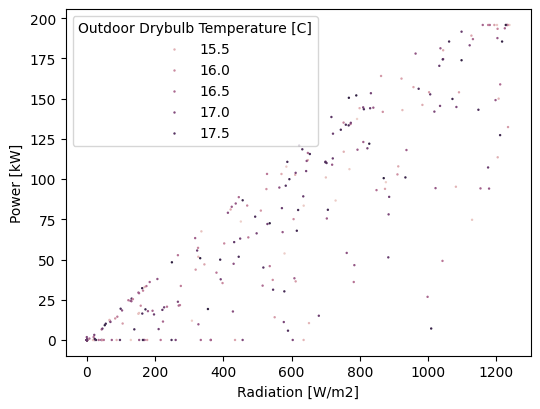

In [13]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Radiation [W/m2]',y='SolarGen'
                ,hue='Outdoor Drybulb Temperature [C]'
                ,s=3
                ,alpha=1
                ,edgecolor="none"
                ,data=df[(df['Outdoor Drybulb Temperature [C]']>15)&(df['Outdoor Drybulb Temperature [C]']<18)])
# plt.xlabel('Temperature [C]')
plt.ylabel('Power [kW]')
plt.savefig('./plots/TX_radiation_generation_bytemperature.pdf', format='pdf', bbox_inches='tight')

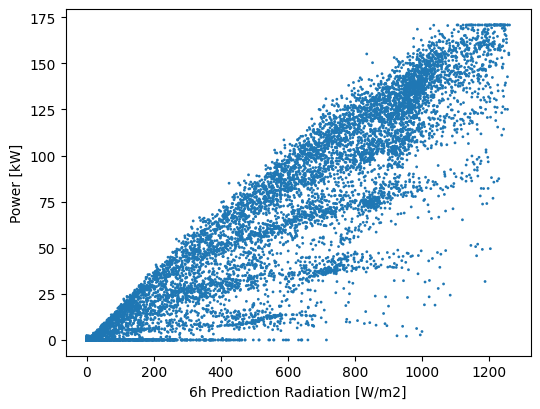

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='6h Prediction Radiation [W/m2]',y='SolarGen'
                #,hue='DaylightSavings'
                ,s=4
                ,edgecolor="none"
                ,data=df)
# plt.xlabel('Temperature [C]')
plt.ylabel('Power [kW]')
plt.savefig('./plots/TX_radiation_generation.pdf', format='pdf', bbox_inches='tight')

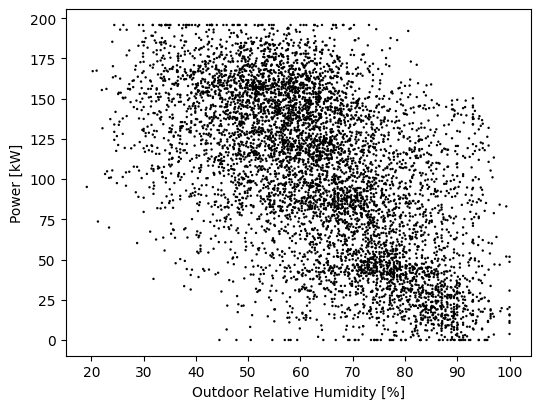

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Relative Humidity [%]',y='SolarGen'
                #,hue='Hour'
                ,s=3
                ,edgecolor="none"
                #,palette='Spectral'
                ,color='black'
                ,data=df[df['Hour'].between(8, 16)])
# plt.xlabel('Temperature [C]')
plt.ylabel('Power [kW]')
plt.savefig('./plots/TX_humidity_generation_middle_of_day.pdf', format='pdf', bbox_inches='tight')

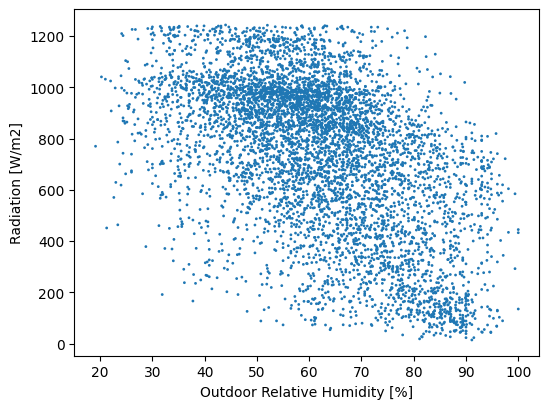

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Relative Humidity [%]',y='Radiation [W/m2]'
                #,hue='Hour'
                ,s=4
                ,edgecolor="none"
                #,palette='Spectral'
                ,data=df[df['Hour'].between(9, 16)])
plt.savefig('./plots/TX_humidity_radiation.pdf', format='pdf', bbox_inches='tight')

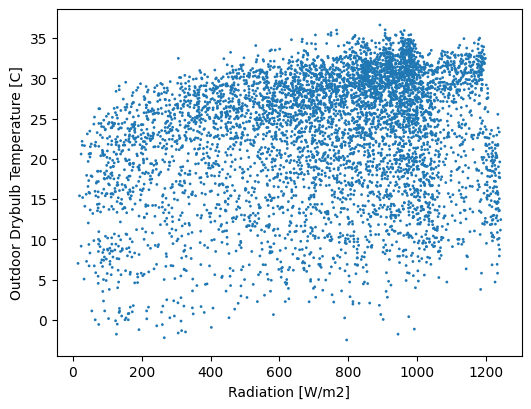

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Radiation [W/m2]',y='Outdoor Drybulb Temperature [C]'
                #,hue='DaylightSavings'
                ,s=4
                ,edgecolor="none"
                ,data=df[df['Hour'].between(9, 16)])

plt.savefig('./plots/TX_radiation_temperature.pdf', format='pdf', bbox_inches='tight')

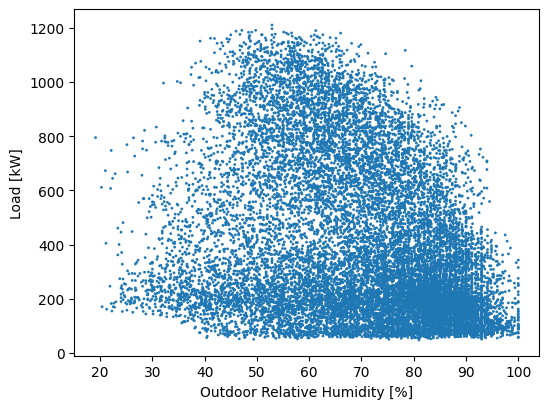

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(x='Outdoor Relative Humidity [%]',y='Load'
                #,hue='DaylightSavings'
                ,s=4
                ,edgecolor="none"
                ,data=df)
# plt.xlabel('Temperature [C]')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_humidity_load.pdf', format='pdf', bbox_inches='tight')

In [ ]:
df.columns

Index(['Month', 'Hour', 'DayType', 'DaylightSavings', 'Load', 'Load_1',
       'Load_2', 'Load_3', 'Load_4', 'Load_5', 'Load_6', 'Load_7', 'Load_8',
       'Load_9', 'SolarGen', 'Price', 'Outdoor Drybulb Temperature [C]',
       'Outdoor Relative Humidity [%]', 'Diffuse Solar Radiation [W/m2]',
       'Direct Solar Radiation [W/m2]',
       '6h Prediction Outdoor Drybulb Temperature [C]',
       '12h Prediction Outdoor Drybulb Temperature [C]',
       '24h Prediction Outdoor Drybulb Temperature [C]',
       '6h Prediction Outdoor Relative Humidity [%]',
       '12h Prediction Outdoor Relative Humidity [%]',
       '24h Prediction Outdoor Relative Humidity [%]',
       '6h Prediction Diffuse Solar Radiation [W/m2]',
       '12h Prediction Diffuse Solar Radiation [W/m2]',
       '24h Prediction Diffuse Solar Radiation [W/m2]',
       '6h Prediction Direct Solar Radiation [W/m2]',
       '12h Prediction Direct Solar Radiation [W/m2]',
       '24h Prediction Direct Solar Radiation [W/m2]',

### Time series plots

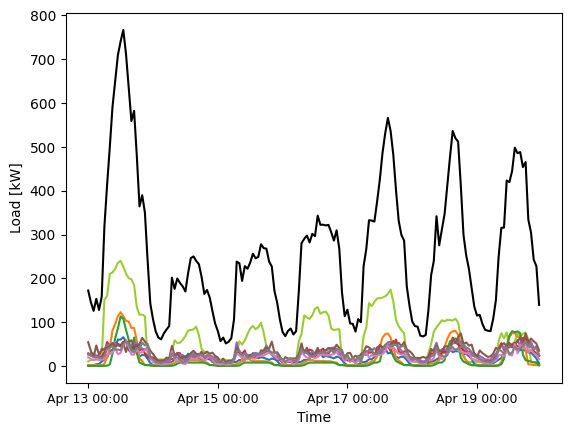

In [ ]:
df2 = df[(df['Timestamp']>='2016-04-13') & (df['Timestamp']<='2016-04-20')]
fig, ax = plt.subplots()
df2['Load'].plot(color='black')
df2['Load_1'].plot(color='yellowgreen')
df2['Load_2'].plot()
df2['Load_3'].plot()
df2['Load_4'].plot()
df2['Load_5'].plot()
df2['Load_6'].plot()
df2['Load_7'].plot()
df2['Load_8'].plot()
df2['Load_9'].plot()
plt.xticks(range(2423, 2423+48*4, 48))
ax.set_xticklabels(['Apr 13 00:00','Apr 15 00:00','Apr 17 00:00','Apr 19 00:00'])
ax.tick_params(axis='x', which='major', labelsize=9)
plt.xlabel('Time')
plt.ylabel('Load [kW]')
plt.savefig('./plots/TX_load_1week.pdf', format='pdf', bbox_inches='tight')

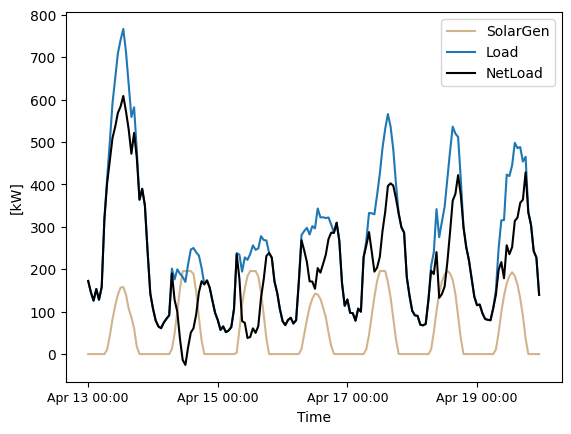

In [ ]:
df2 = df[(df['Timestamp']>='2016-04-13') & (df['Timestamp']<='2016-04-20')]
fig, ax = plt.subplots()
df2['SolarGen'].plot(color='tan')
df2['Load'].plot()
df2['NetLoad'].plot(color='black')
plt.xticks(range(2423, 2423+48*4, 48))
ax.set_xticklabels(['Apr 13 00:00','Apr 15 00:00','Apr 17 00:00','Apr 19 00:00'])
ax.tick_params(axis='x', which='major', labelsize=9)
plt.legend()
plt.ylabel('[kW]')
plt.xlabel('Time')
plt.savefig('./plots/TX_netload_1week.pdf', format='pdf', bbox_inches='tight')

In [ ]:
df[df['Timestamp']=='2016-04-20 23:00:00']

,Month,Hour,DayType,Workday,DaylightSavings,Load,Load_1,Load_2,Load_3,Load_4,...,24h Prediction Radiation [W/m2],TempLag,TempLag2,TempLag3,TempLag22,TempLag23,TempLag24,TempMean24,TempMean1W,Timestamp
2614,4,23,Mon,True,1,178.19,16.71,6.74,2.36,1.45,...,0.0,18.68,19.53,20.43,17.51,18.43,19.21,20.035417,17.391607,2016-04-20 23:00:00


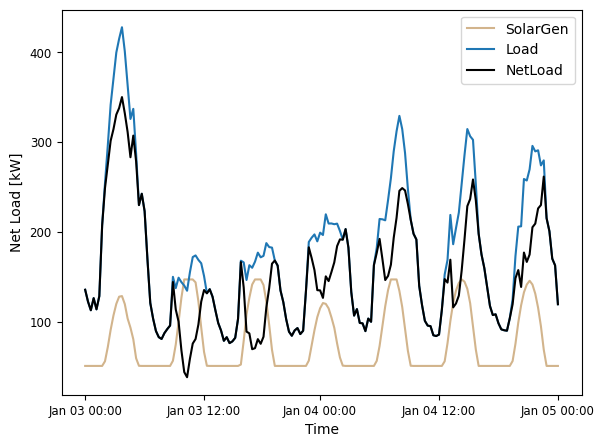

In [ ]:
df2 = df[(df['Timestamp']>='2016-04-13') & (df['Timestamp']<='2016-04-20')]
fig, ax = plt.subplots(figsize=(6.71,5))
df2['SolarGen'].plot(color='tan')
df2['Load'].plot()
df2['NetLoad'].plot(color='black')
plt.xticks([2423,2465,2506,2548,2590])
plt.yticks([100,303.3,506.66,710])
ax.set_xticklabels(['Jan 03 00:00','Jan 03 12:00','Jan 04 00:00','Jan 04 12:00','Jan 05 00:00'])
ax.set_yticklabels(['100','200','300','400'])
ax.tick_params(axis='both', which='major', labelsize=8.5)
plt.legend()
plt.ylabel('Net Load [kW]')
plt.xlabel('Time')
plt.savefig('./plots/simulated_bl.pdf', format='pdf', bbox_inches='tight')

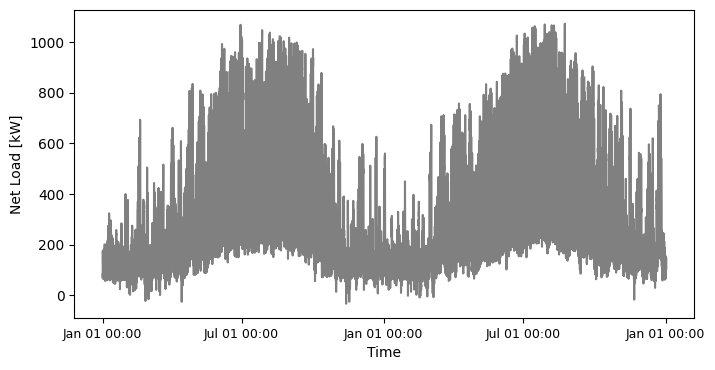

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
df['NetLoad'].plot(color='grey')
plt.xticks([0,4319,8735,13079,17500])
ax.set_xticklabels(['Jan 01 00:00','Jul 01 00:00','Jan 01 00:00','Jul 01 00:00','Jan 01 00:00'])
ax.tick_params(axis='x', which='major', labelsize=9)
plt.ylabel('Net Load [kW]')
plt.xlabel('Time')
plt.savefig('./plots/TX_netload_full.pdf', format='pdf', bbox_inches='tight')

<Axes: >

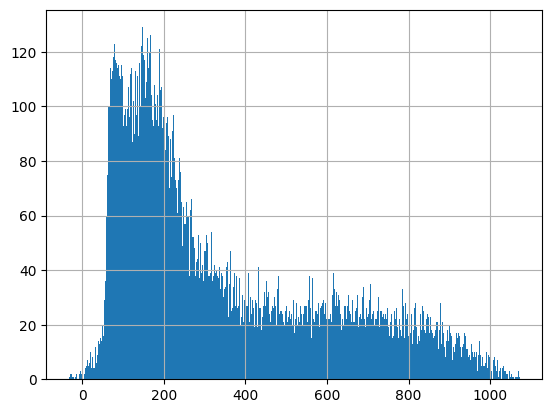

In [ ]:
df['NetLoad'].hist(bins=500)

In [ ]:
df[(df['Timestamp']>='2016-04-14') & (df['Timestamp']<='2016-04-19')]

,Month,Hour,DayType,Workday,DaylightSavings,Load,Load_1,Load_2,Load_3,Load_4,...,12h Prediction Outdoor Relative Humidity [%],24h Prediction Outdoor Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2],Radiation [W/m2],Timestamp
2471,4,24,Mon,True,1,107.09,14.37,2.38,2.36,0.44,...,94.15,95.31,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 00:00:00
2472,4,1,Tue,True,1,79.07,14.93,1.92,2.36,0.44,...,92.35,92.32,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 01:00:00
2473,4,2,Tue,True,1,65.14,15.46,2.37,2.36,0.44,...,90.80,93.34,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 02:00:00
2474,4,3,Tue,True,1,61.07,15.20,1.92,2.36,0.44,...,82.19,81.51,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 03:00:00
2475,4,4,Tue,True,1,74.33,15.00,3.27,2.36,0.44,...,88.82,92.88,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-14 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,4,19,Sat,False,1,299.26,28.97,27.08,21.52,10.14,...,50.53,49.30,3.16,3.19,3.27,145.89,147.6,151.01,147.31,2016-04-18 19:00:00
2587,4,20,Sat,False,1,252.55,8.60,28.06,13.25,7.56,...,50.34,49.68,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-18 20:00:00
2588,4,21,Sat,False,1,221.63,8.70,22.77,7.59,3.91,...,60.68,62.25,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-18 21:00:00
2589,4,22,Sat,False,1,177.88,9.60,16.36,1.77,2.35,...,69.14,69.90,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2016-04-18 22:00:00


In [ ]:
df2.loc[(df['DaylightSavings']==0) & (df['DayType']=='Tue') & (df['Hour']==7),'Load'].mean()

136.05

In [ ]:
df2.loc[(df['DaylightSavings']==1) & (df['DayType']=='Tue') & (df['Hour']==7),'Load'].mean()

204.29666666666665

In [ ]:
pd.DataFrame([f, den])

,0,1,2,3,4,5,6,7,8,9,...,8751,8752,8753,8754,8755,8756,8757,8758,8759,8760
0,0.000000e+00,5.707763e-05,1.141553e-04,1.712329e-04,2.283105e-04,2.853881e-04,3.424658e-04,3.995434e-04,4.566210e-04,0.000514,...,0.499486,0.499543,0.499600,0.499658,0.499715,0.499772,0.499829,0.499886,0.499943,0.500000
1,6.353049e-25,1.724257e+06,4.390549e+08,3.807119e+06,5.178519e+06,1.439210e+06,1.590731e+06,3.810985e+06,2.666218e+06,39727.941868,...,271.912407,1202.199272,776.874103,1619.889360,1027.598971,8078.260557,110.192957,15377.665220,79.377638,102.811983


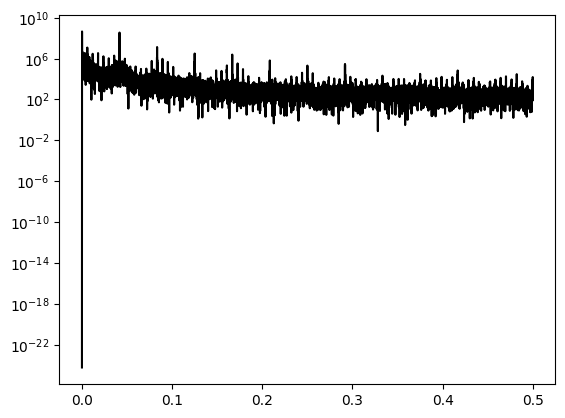

In [ ]:
from scipy import signal as sign

f, den = sign.periodogram(df['NetLoad'])
plt.plot(f, den, color='black')
plt.yscale('log')